<a href="https://colab.research.google.com/github/mmmchai/data-science/blob/main/Data%20Science%20Project%20-%20FoodHub%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/MIT Data Science/01 - Foundation - Python and Statistics/Project/foodhub_order.csv"

### Understanding the structure of the data

In [ ]:
# read the data
df = pd.read_csv(file_path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
There are 1898 rows and 9 columns in this dataset.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
print("dtype int64:", df.select_dtypes(include="int64").columns.tolist())
print("dtype float64:", df.select_dtypes(include="float64").columns.tolist())
print("dtype object:", df.select_dtypes(include="object").columns.tolist())

dtype int64: ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
dtype float64: ['cost_of_the_order']
dtype object: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']


#### Observations:
The dataset includes integer, float, and object (categorical/text) data types.

*   Integer columns are: ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
*   Float columns are: ['cost_of_the_order']
*   Object (categorical/text) columns are: ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

The rating column, though currently an object, requires conversion to a numerical format as this field represents a numerical scale from 1 to 5.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
There are no missing values present in the original dataset.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [ ]:
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:


*   Min food preparation = 20 mins
*   Max food preparation = 35 mins
*   Average food preparation = 27.372 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df["rating"].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["rating"].value_counts()

,count
rating,
5.000,588
4.000,386
3.000,188


In [ ]:
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


In [ ]:
#check % of unique values
df.nunique() / df.shape[0]

,0
order_id,1.000
customer_id,0.632
restaurant_name,0.094
cuisine_type,0.007
cost_of_the_order,0.164
day_of_the_week,0.001
rating,0.002
food_preparation_time,0.008
delivery_time,0.010


#### Observations:
There are 736 unrated orders.

To ease further analysis, "Rating" column is converted to a numeric datatype by replacing value "Not Given" with NaN . This transformation resulted in 736 missing values.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# check unique
df.nunique()

,0
order_id,1898
customer_id,1200
restaurant_name,178
cuisine_type,14
cost_of_the_order,312
day_of_the_week,2
rating,3
food_preparation_time,16
delivery_time,19


<Axes: xlabel='delivery_time'>

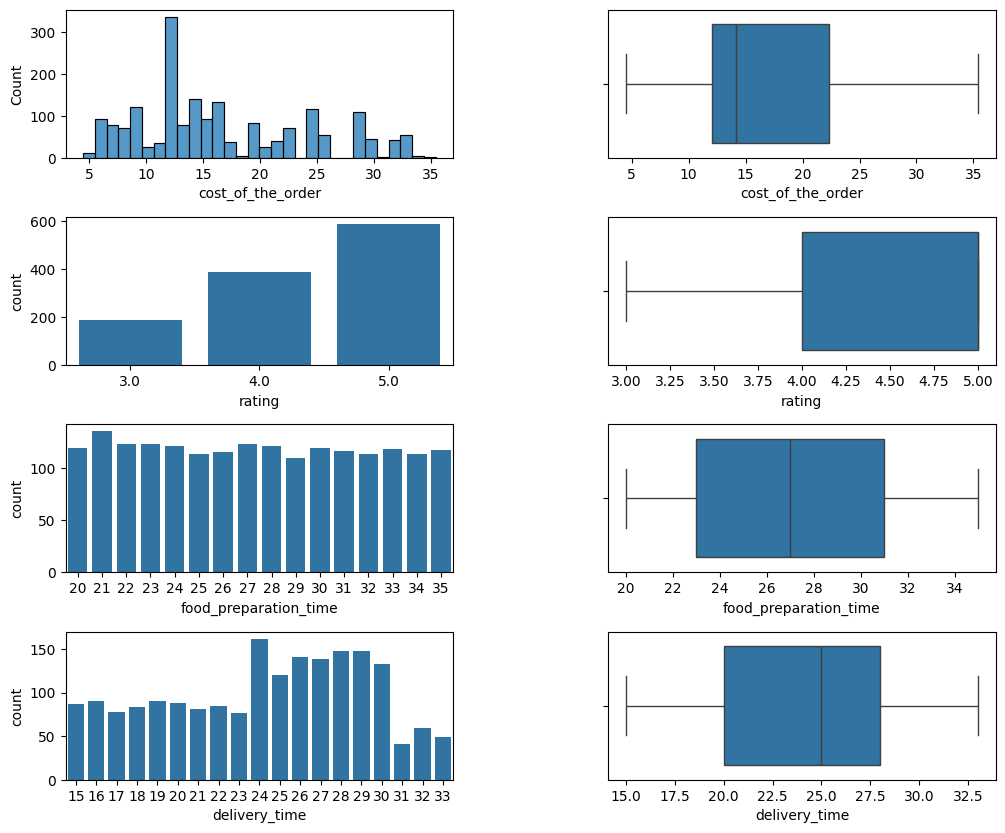

In [ ]:
fig = plt.figure(figsize=(12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
sns.histplot(data=df,x='cost_of_the_order', bins=30)
ax = fig.add_subplot(4, 2, 2)
sns.boxplot(data=df,x='cost_of_the_order')

ax = fig.add_subplot(4, 2, 3)
sns.countplot(data=df,x='rating')
ax = fig.add_subplot(4, 2, 4)
sns.boxplot(data=df,x='rating')

ax = fig.add_subplot(4, 2, 5)
sns.countplot(data=df,x='food_preparation_time')
ax = fig.add_subplot(4, 2, 6)
sns.boxplot(data=df,x='food_preparation_time')

ax = fig.add_subplot(4, 2, 7)
sns.countplot(data=df,x='delivery_time')
ax = fig.add_subplot(4, 2, 8)
sns.boxplot(data=df,x='delivery_time')

([0, 1], [Text(0, 0, 'Weekend'), Text(1, 0, 'Weekday')])

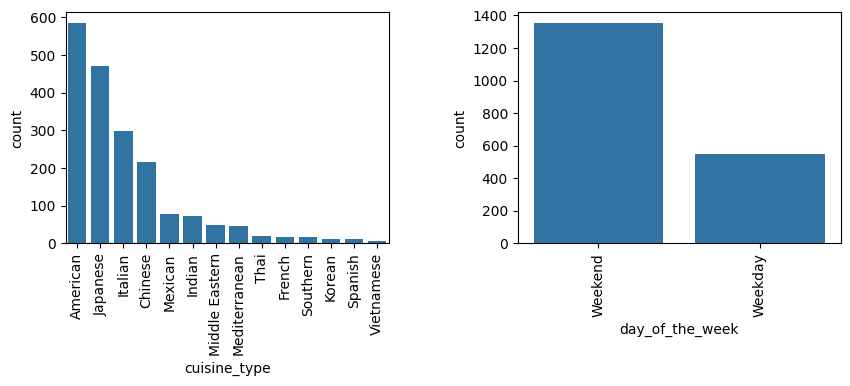

In [ ]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 2, 1)
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 2, 2)
sns.countplot(data=df,
              x='day_of_the_week',
              order = df['day_of_the_week'].value_counts().index)
plt.xticks(rotation=90)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


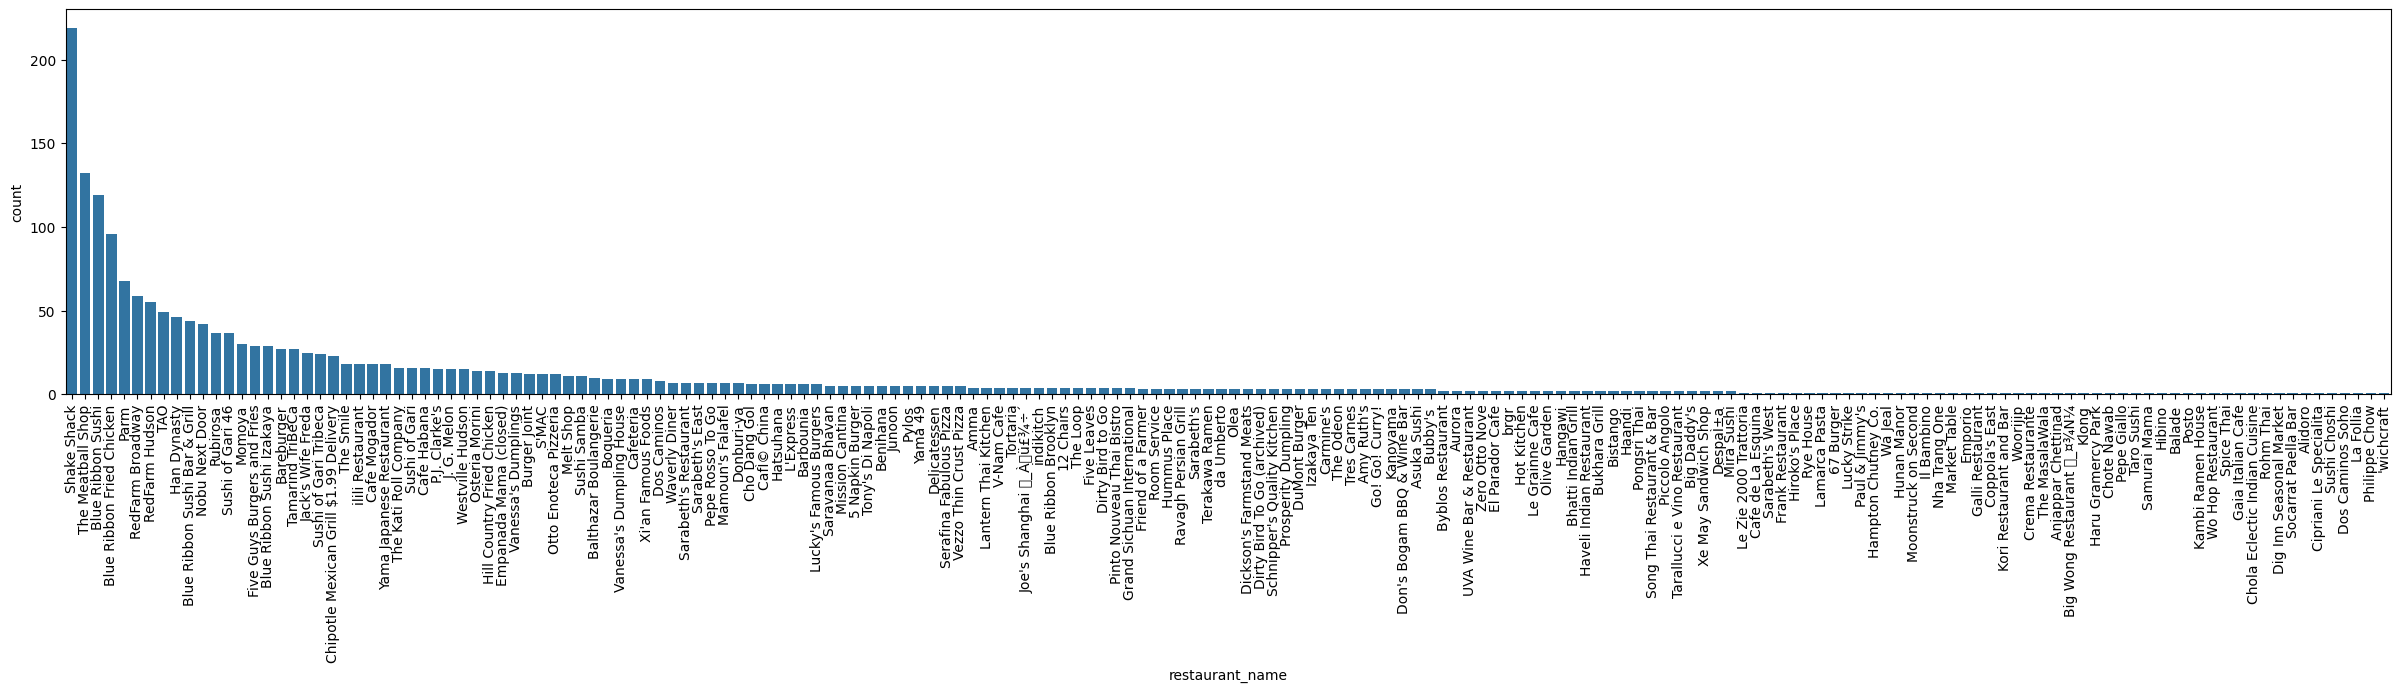

In [ ]:
x_axis = "restaurant_name"
plt.figure(figsize=(30,5))
sns.countplot(data=df,
              x= x_axis,
              order = df[x_axis].value_counts().index)
plt.xticks(rotation=90)
plt.show()

####Observations

*  **Cost of order**: Right skewed data. There are more orders below the average cost, among which $12 dollar orders are the majority.

*  **Rating**:  Assuming the data is accurate and no low ratings are deleted, only people who are satisfied with the order tends to leave a rating, majority of the orders received 5-star rating.

*  **Preparation time**: Uniform distribution.

*  **Delivery time**: Most of the orders are delivered between 24 - 30 mins.

*  **Cuisine typ**e: Among the 14 cuisine types, the top 4 most popular cuisines are American, Japanese, Italian and Chinese, which have significantly higher # of orders than the rest.

*   **Day of Week**: The total # of orders received during weekends is 50% more than weekdays. This does not consider the difference in # of days during these 2 periods (2 days in weekend, 5 days in weekdays).

*   **Restaurant Name**: Shake shack is the most popular restaurant on this app.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
df["restaurant_name"].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [ ]:
# % of total order
df["restaurant_name"].value_counts().head(5) / df.shape[0] * 100

,count
restaurant_name,
Shake Shack,11.538
The Meatball Shop,6.955
Blue Ribbon Sushi,6.270
Blue Ribbon Fried Chicken,5.058
Parm,3.583


#### Observations:
1.  Shake Shack, 219 orders
2.  The Meatball Shop,	132 orders
3.  Blue Ribbon Sushi,	119 orders
4.  Blue Ribbon Fried Chicken,	96 orders
5.  Parm,	68 orders




### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df[df["day_of_the_week"]=="Weekend"].groupby("cuisine_type").size().sort_values(ascending=False).head(1)

,0
cuisine_type,
American,415


#### Observations:
American is the most popular on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df["cost_of_the_order"]>20].shape[0] / df.shape[0] * 100

29.24130663856691

#### Observations:
29% of orders cost more than $20.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df["delivery_time"].mean()

24.161749209694417

#### Observations:
24 mins is the mean delivery time.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df["customer_id"].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


1.   Cutomer ID 52832, 13 orders
2.   Cutomer ID 47440, 10 orders
3.   Cutomer ID 83287, 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


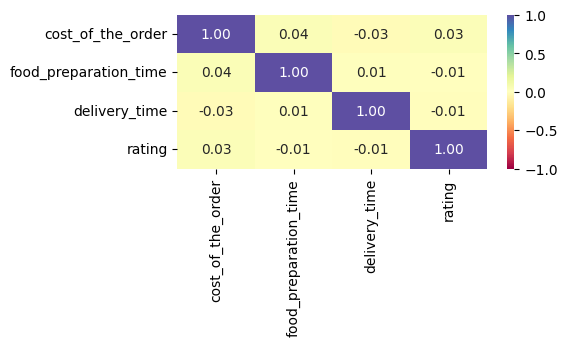

In [ ]:
# Corration
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
plt.figure(figsize=(5, 2))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Avg Cost vs Avg Rating by Cuisine

In [ ]:
avg_rating_per_cuisine  = df.groupby("cuisine_type")["rating"].mean().sort_values(ascending=False)
avg_cost_per_cuisine = df.groupby("cuisine_type")["cost_of_the_order"].mean().sort_values(ascending=False)
total_order = df.groupby("cuisine_type")["order_id"].count().sort_values(ascending=False)

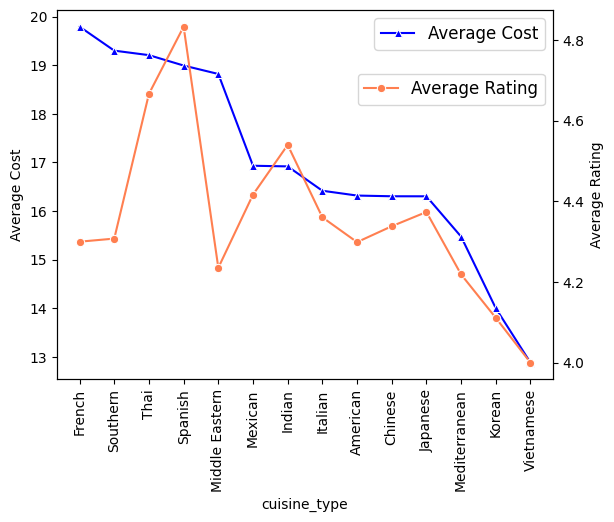

In [ ]:
fig, ax1 = plt.subplots()
sns.lineplot(
    x=avg_cost_per_cuisine.index,
    y=avg_cost_per_cuisine.values,
    ax=ax1,
    color='blue',
    marker='^')
ax1.set_ylabel('Average Cost')
plt.legend(["Average Cost"],fontsize=12,bbox_to_anchor=(1,1))
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.lineplot(
    x=avg_rating_per_cuisine.index,
    y=avg_rating_per_cuisine.values,
    ax=ax2,
    color='coral',
    marker='o')
ax2.set_ylabel('Average Rating')
plt.legend(["Average Rating"],fontsize=12,bbox_to_anchor=(1,0.85))
plt.xticks(rotation=90)
plt.show()


*   Cuisine types with price higher than average do not necessarily have higher than average rating.

#### Cuisine vs. Cost

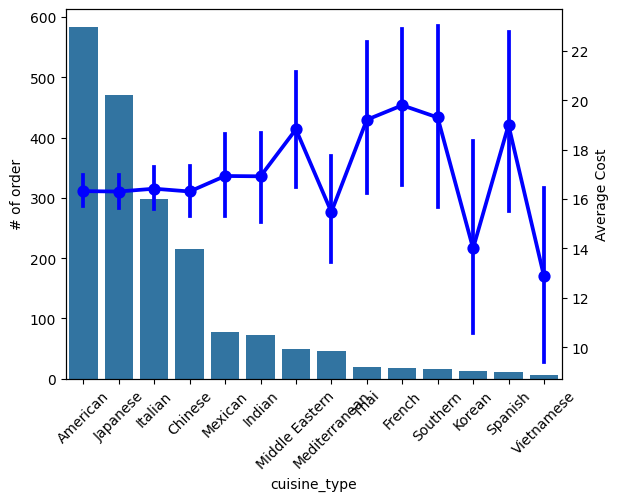

In [ ]:
# Total order vs Average Cost
fig, ax1 = plt.subplots()
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
ax1.set_ylabel('# of order')
plt.xticks(rotation=45)

ax2 = ax1.twinx()
sns.pointplot(
    data=df,
    x="cuisine_type",
    y="cost_of_the_order",
    estimator=lambda x: x.mean(),
    color="blue",
    order=total_order.index)
ax2.set_ylabel('Average Cost')

plt.show()

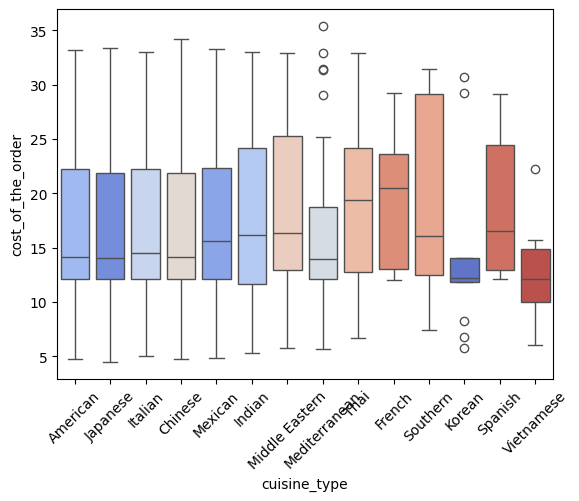

In [ ]:
# Cost Boxplot
sns.boxplot(
    data = df,
    x = "cuisine_type",
    y = "cost_of_the_order",
    order=total_order.index,
    hue='cuisine_type',
    palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

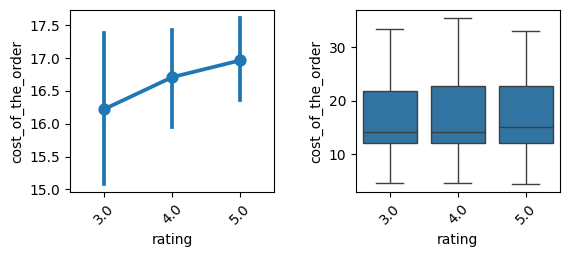

In [ ]:
# Rating vs. Cost
fig = plt.figure(figsize=(10,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 3, 1)
sns.pointplot(data=df,
              x="rating",
              y="cost_of_the_order")
plt.xticks(rotation=45)

ax = fig.add_subplot(3, 3, 2)
sns.boxplot(
    x = "rating",
    y = "cost_of_the_order",
    data = df)
plt.xticks(rotation=45)

plt.show()

*   For the most popular cuisines (American, Japanese, Italian, Chinese), the average cost of these cuisines are around the overall average of all cuisines. The median cost is towards the bottom of the interquartile range, which means more customers prefers budget friendly items on the menu, the higher priced items are ordered less frequently.  

*   Some Mediterranean restaurant are priced significantly higher than others offer the same food.

*   Korean restaurants have a large price discrepancy with outliers on both ends.

*   Korean and Vietnamese have the lowest price on average, however they are also one of the least popular cuisine types on this platform.

*   Customers are willing to pay slighly higher for higher rated food.  

#### Day of week vs Order duration

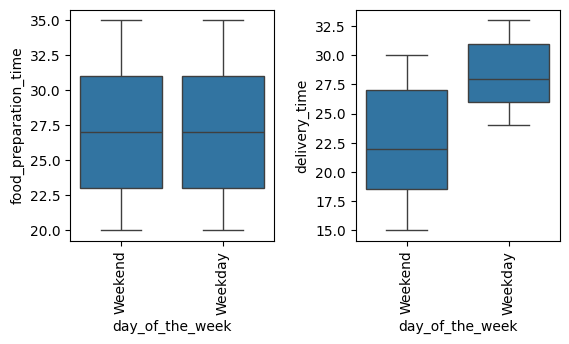

In [ ]:
fig = plt.figure(figsize=(10,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
sns.boxplot(
    x = "day_of_the_week",
    y = "food_preparation_time",
    data = df)
plt.xticks(rotation=90)

ax = fig.add_subplot(1, 3, 2)
sns.boxplot(
    x = "day_of_the_week",
    y = "delivery_time",
    data = df)
plt.xticks(rotation=90)

plt.show()

*   delivery time during the weekday signifiantly increased
*   there is no difference in food preparation time between weekends or weekdays
*   suggesting potential bottleneck in delivery capacity

#### Cuisine vs. Rating

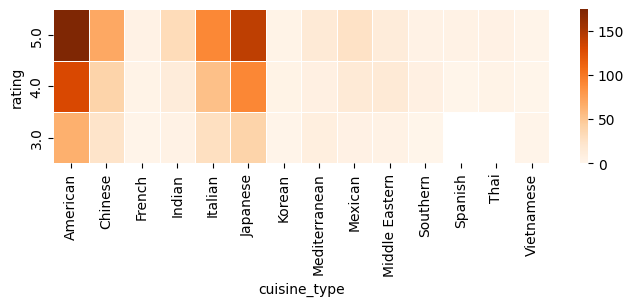

In [ ]:
df_piv = df.pivot_table(index = 'rating', columns = 'cuisine_type', values = 'order_id',aggfunc='count').sort_index(ascending=False)
plt.figure(figsize = (8,2)) # To resize the plot
sns.heatmap(df_piv,  fmt = "d", cmap="Oranges", linewidths = .5, vmin = 0)
plt.show()


*   the higher the rating, the more the order.



#### Preparation Time

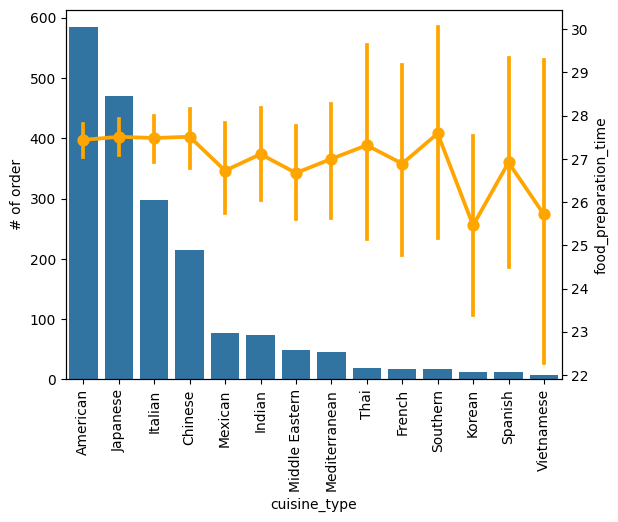

In [ ]:
fig, ax1 = plt.subplots()
sns.countplot(data=df,
              x='cuisine_type' ,
              order = df['cuisine_type'].value_counts().index)
ax1.set_ylabel('# of order')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
sns.pointplot(
    data=df,
    x="cuisine_type",
    y="food_preparation_time",
    estimator=lambda x: x.mean(),
    color="orange",
    order=total_order.index)
ax2.set_ylabel('food_preparation_time')

plt.show()

<ipython-input-36-ddda34cd8d5a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


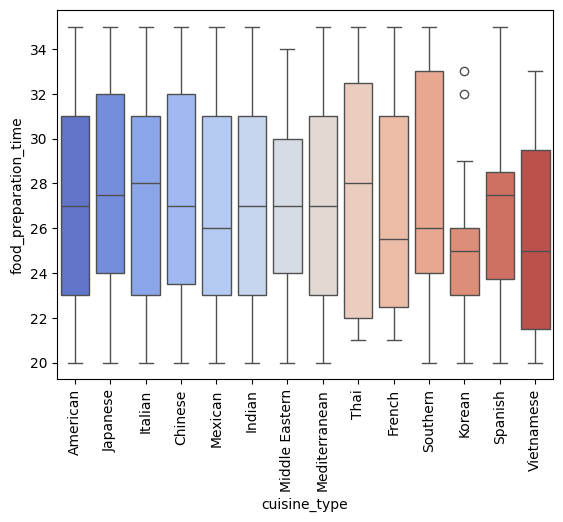

In [ ]:
sns.boxplot(
    x = "cuisine_type",
    y = "food_preparation_time",
    order=total_order.index,
    data = df,
    palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

<ipython-input-37-56a1f22ee3d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


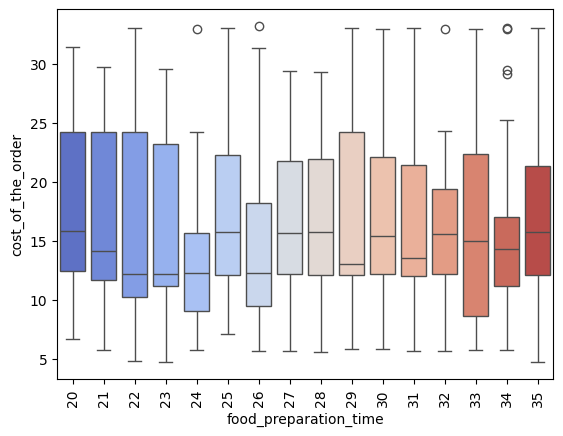

In [ ]:
# cost of the order vs. preparation time
df_topcuisine = df[df["cuisine_type"].isin(["American"])]
sns.boxplot(
    x = "food_preparation_time",
    y = "cost_of_the_order",
    data = df_topcuisine,
    palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

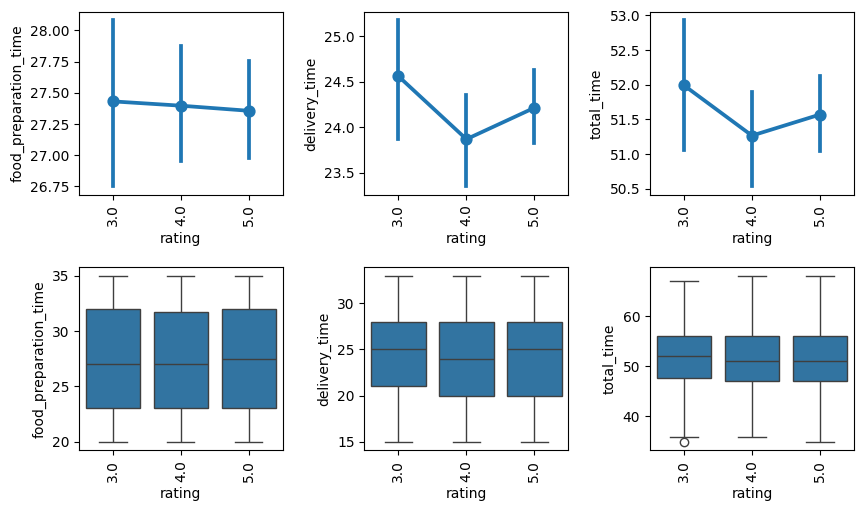

In [ ]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

fig = plt.figure(figsize=(10,9))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


ax = fig.add_subplot(3, 3, 4)
sns.pointplot(data=df,
              x="rating",
              y="food_preparation_time")
plt.xticks(rotation=90)

ax = fig.add_subplot(3, 3, 5)
sns.pointplot(data=df,
              x="rating",
              y="delivery_time")
plt.xticks(rotation=90)

ax = fig.add_subplot(3, 3, 6)
sns.pointplot(data=df,
              x="rating",
              y="total_time")
plt.xticks(rotation=90)

ax = fig.add_subplot(3, 3, 7)
sns.boxplot(
    x = "rating",
    y = "food_preparation_time",
    data = df)
plt.xticks(rotation=90)

ax = fig.add_subplot(3, 3, 8)
sns.boxplot(
    x = "rating",
    y = "delivery_time",
    data = df)
plt.xticks(rotation=90)

ax = fig.add_subplot(3, 3, 9)
sns.boxplot(
    x = "rating",
    y = "total_time",
    data = df)
plt.xticks(rotation=90)

plt.show()


*   The top 4 cuisines requires similar time to prepare order, which is close to the average time of all orders.
*   No significant relationship is observed over food prep time vs rating, or food prep time vs cost of the order




#### Top Restaurants

In [ ]:
#top N restaurant
n = 10
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(n)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.530
The Meatball Shop,2145.210
Blue Ribbon Sushi,1903.950
Blue Ribbon Fried Chicken,1662.290
Parm,1112.760
RedFarm Broadway,965.130
RedFarm Hudson,921.210
TAO,834.500
Han Dynasty,755.290


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
restaurant_ratings  = df.groupby("restaurant_name")["rating"].agg(rating_count="count", avg_rating="mean").reset_index()
eligible_restaurants = restaurant_ratings[(restaurant_ratings["rating_count"] > 50) & (restaurant_ratings["avg_rating"] > 4)]
eligible_restaurants["restaurant_name"].to_list()

['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop']

#### Observations:
['Blue Ribbon Fried Chicken',
 'Blue Ribbon Sushi',
 'Shake Shack',
 'The Meatball Shop'] are eligible to receive this offer

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_additional_charge(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return 0

df["additional_charge"] = df["cost_of_the_order"].apply(calculate_additional_charge)
df["additional_charge"].sum() + df["cost_of_the_order"].sum()

37481.123

#### Observations:
Net revenue = $ 37481.12

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
df["total_time"] = df["delivery_time"] + df["food_preparation_time"]
round(df[df["total_time"] > 60]["order_id"].count() / df.shape[0], 2)

0.11

#### Observations:
11% of orders take more than 60 mins to get delivered.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby("day_of_the_week")["delivery_time"].mean()

,delivery_time
day_of_the_week,
Weekday,28.340
Weekend,22.470


#### Observations:
Weekdays delivery takes 6 mins on average more than weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
# Top 4 Cuisine Types % Revenue Contribution
top_cuisine_rev = df.groupby("cuisine_type")["cost_of_the_order"].sum().sort_values(ascending=False).head(4).sum() / df["cost_of_the_order"].sum()
# Top 5 Restaurant % Revenue Contribution
top_restaurant_rev = df.groupby(["restaurant_name", "cuisine_type"])["cost_of_the_order"].sum().sort_values(ascending=False).head(5).sum() / df["cost_of_the_order"].sum()
print(f"Top 4 Cuisine Types % Revenue Contribution: {round(top_cuisine_rev * 100, 2)}%")
print(f"Top 5 Restaurant % Revenue Contribution: {round(top_restaurant_rev * 100, 2)}%")

Top 4 Cuisine Types % Revenue Contribution: 81.73%
Top 5 Restaurant % Revenue Contribution: 32.19%


### Conclusions:
**Revenue**:
* The top 5 restaurants contribute ~30% of total revenue, indicating a few major restaurants dominate the platform.
* The 4 popular cuisines are American, Japanese, Italian, Chinese, which contribute over 80% of the total revenue. These cuisines drive most of the business on the platform.

**Rating**:
* Among restaurants of the same cuisine type, highly-rated restaurants receives more order, indicating quality and customer satisfaction influence demand.
* Cuisine types with high price do not guarantee high rating, indicating some restaurants may be overpriced, or did not provide high-than-par service quality to match its price points.
* Customers are willing to pay slightly higher for highly-rated food.

**Order Cost**:
* For the most popular cuisines (American, Japanese, Italian, Chinese), the average cost of these cuisines are close to the overall platform average. The median cost is skewed towards the lower end of the price range, which means more customers prefers budget friendly items on the menu, the higher priced items are ordered less frequently.
* Mediterranean, Korean, and a few Vietnamese restaurants show significant price variation, suggesting inconsistent pricing strategies.
* Furthermore, Korean and Vietnamese have the lowest price on average, however they are also one of the least popular cuisine types on this platform. This indicates that customers are also influenced by other factors besides price, such as service, portion size, food quality.

**Delivery Time**:
* Delivery time significantly increases during the weekdays, while food preparation time remains constant between weekends or weekdays, suggesting potential bottleneck in delivery capacity during weekdays.

### Recommendations:

**Revenue Strategy**:
* Leverage top-performing restaurants and form partnership strategies. Up-sell and cross-sell their menu items, since most customers are ordering budget-friendly items, but are willing to pay higher for high quality food. Promote top restaurants in the search results, provide discounts / promotions for higher-price items to drive adoption.

* The promotions can be customized to each customer's purchase behaviour, or restaurants with higher ratings, as it is more likely for these restaurants to attract and retain new customers.

* Incentivize customers to leave a rating.

* Onboard new restaurants that specialize in popular cuisine types to capture additional customers.

* For restaurants that have a high price but low rating, such as French and Southern, provide feedback to these restaurants.

* Monitor pricing variability and reduce extreme pricing discrepancies.

**Operation**:
* Further analyze the root cause for delivery bottleneck on weekdays, understand whether it varies by hour of the day due to peak demands during lunch and dinner time, or rush hour traffic.


---